# GAN Using Keras and CIFAR10

# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD

# Load Data

In [2]:
(X, y), (_, _) = tf.keras.datasets.cifar10.load_data()

# Selecting a single class of images
# The number was randomly chosen and any number
# between 1 and 10 can be chosen
X = X[y.flatten() == 8]

170498071/170498071 [==============================] - 2s 0us/step


# Define Parameters

In [3]:
# Defining the Input shape
image_shape = (32, 32, 3)
latent_dimensions = 100

# Generator Function

In [4]:
def build_generator():

        model = Sequential()

        # Building the input layer
        model.add(Dense(128 * 8 * 8, activation = "relu",
                        input_dim = latent_dimensions))
        model.add(Reshape((8, 8, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size = 3, padding = "same"))
        model.add(BatchNormalization(momentum = 0.78))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size = 3, padding = "same"))
        model.add(BatchNormalization(momentum = 0.78))
        model.add(Activation("relu"))
        model.add(Conv2D(3, kernel_size = 3, padding = "same"))
        model.add(Activation("tanh"))

        # Generating the output image
        noise = Input(shape = (latent_dimensions,))
        image = model(noise)

        return Model(noise, image)

# Discriminator Function

In [5]:
def build_discriminator():

        # Building the convolutional layers
        # to classify whether an image is real or fake
        model = Sequential()
        model.add(Conv2D(32, kernel_size = 3, strides = 2,
                         input_shape = image_shape, padding = "same"))
        model.add(LeakyReLU(alpha = 0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size = 3, strides = 2, padding = "same"))
        model.add(ZeroPadding2D(padding = ((0, 1),(0, 1))))
        model.add(BatchNormalization(momentum = 0.82))
        model.add(LeakyReLU(alpha = 0.25))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size = 3, strides = 2, padding = "same"))
        model.add(BatchNormalization(momentum = 0.82))
        model.add(LeakyReLU(alpha = 0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size = 3, strides = 1, padding = "same"))
        model.add(BatchNormalization(momentum = 0.8))
        model.add(LeakyReLU(alpha = 0.25))
        model.add(Dropout(0.25))

        # Building the output layer
        model.add(Flatten())
        model.add(Dense(1, activation = 'sigmoid'))
        image = Input(shape = image_shape)
        validity = model(image)

        return Model(image, validity)

# Image Generator

In [6]:
def display_images():

        r, c = 4, 4
        noise = np.random.normal(0, 1, (r * c, latent_dimensions))
        generated_images = generator.predict(noise)

        # Scaling the generated images
        generated_images = 0.5 * generated_images + 0.5
        fig, axs = plt.subplots(r, c)
        count = 0

        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(generated_images[count, :, :,])
                axs[i,j].axis('off')
                count += 1

        plt.show()
        plt.close()

# Build GAN

In [7]:
# Building and compiling the discriminator
discriminator = build_discriminator()

discriminator.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(0.0002, 0.5),
    metrics = ['accuracy']
    )

# Making the discriminator untrainable
# so that the generator can learn from fixed gradient
discriminator.trainable = False

# Building the generator
generator = build_generator()

# Defining the input for the generator and generating the images
z = Input(shape = (latent_dimensions,))
image = generator(z)

# Checking the validity of the generated image
valid = discriminator(image)

# Defining the combined model of the generator and the discriminator
combined_network = Model(z, valid)
combined_network.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.0002, 0.5)
    )

# Train Network

1/1 [==============================] - 0s 174ms/step
0
1/1 [==============================] - 0s 114ms/step


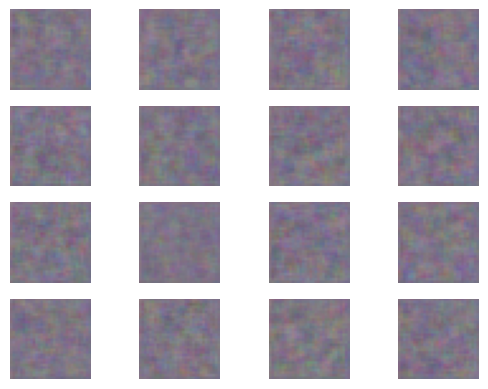

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step
2
1/1 [==============================] - 0s 39ms/step
3
1/1 [==============================] - 0s 39ms/step
4
1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 36ms/step
6
1/1 [==============================] - 0s 37ms/step
7
1/1 [==============================] - 0s 33ms/step
8
1/1 [==============================] - 0s 36ms/step
9
1/1 [==============================] - 0s 36ms/step
10
1/1 [==============================] - 0s 37ms/step
11
1/1 [==============================] - 0s 36ms/step
12
1/1 [==============================] - 0s 36ms/step
13
1/1 [==============================] - 0s 39ms/step
14
1/1 [==============================] - 0s 40ms/step
15
1/1 [==============================] - 0s 36ms/step
16
1/1 [==============================] - 0s 37ms/step
17
1/1 [==============================] - 0s 33ms/step
18
1/1 [=================

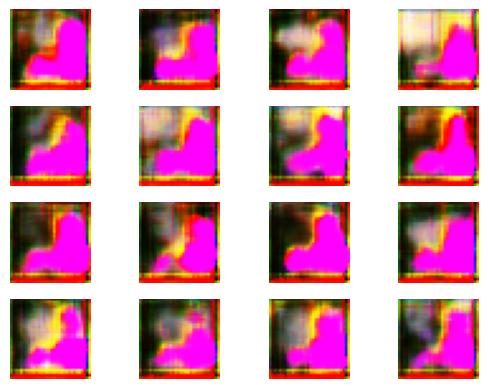

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
2502
1/1 [==============================] - 0s 35ms/step
2503
1/1 [==============================] - 0s 38ms/step
2504
1/1 [==============================] - 0s 34ms/step
2505
1/1 [==============================] - 0s 35ms/step
2506
1/1 [==============================] - 0s 36ms/step
2507
1/1 [==============================] - 0s 42ms/step
2508
1/1 [==============================] - 0s 35ms/step
2509
1/1 [==============================] - 0s 34ms/step
2510
1/1 [==============================] - 0s 34ms/step
2511
1/1 [==============================] - 0s 35ms/step
2512
1/1 [==============================] - 0s 34ms/step
2513
1/1 [==============================] - 0s 33ms/step
2514
1/1 [==============================] - 0s 37ms/step
2515
1/1 [==============================] - 0s 40ms/step
2516
1/1 [==============================] - 0s 33ms/step
2517
1/1 [==============================] 

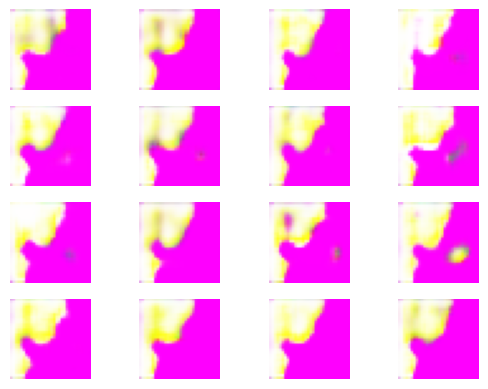

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 37ms/step
5002
1/1 [==============================] - 0s 36ms/step
5003
1/1 [==============================] - 0s 42ms/step
5004
1/1 [==============================] - 0s 36ms/step
5005
1/1 [==============================] - 0s 35ms/step
5006
1/1 [==============================] - 0s 35ms/step
5007
1/1 [==============================] - 0s 35ms/step
5008
1/1 [==============================] - 0s 36ms/step
5009
1/1 [==============================] - 0s 34ms/step
5010
1/1 [==============================] - 0s 36ms/step
5011
1/1 [==============================] - 0s 36ms/step
5012
1/1 [==============================] - 0s 36ms/step
5013
1/1 [==============================] - 0s 35ms/step
5014
1/1 [==============================] - 0s 37ms/step
5015
1/1 [==============================] - 0s 35ms/step
5016
1/1 [==============================] - 0s 38ms/step
5017
1/1 [==============================] 

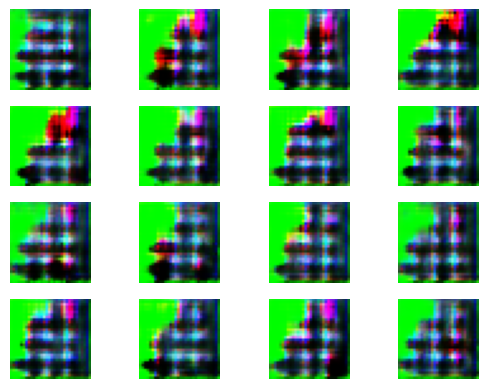

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 40ms/step
7502
1/1 [==============================] - 0s 39ms/step
7503
1/1 [==============================] - 0s 41ms/step
7504
1/1 [==============================] - 0s 45ms/step
7505
1/1 [==============================] - 0s 38ms/step
7506
1/1 [==============================] - 0s 40ms/step
7507
1/1 [==============================] - 0s 38ms/step
7508
1/1 [==============================] - 0s 38ms/step
7509
1/1 [==============================] - 0s 37ms/step
7510
1/1 [==============================] - 0s 38ms/step
7511
1/1 [==============================] - 0s 39ms/step
7512
1/1 [==============================] - 0s 40ms/step
7513
1/1 [==============================] - 0s 38ms/step
7514
1/1 [==============================] - 0s 40ms/step
7515
1/1 [==============================] - 0s 42ms/step
7516
1/1 [==============================] - 0s 41ms/step
7517
1/1 [==============================] 

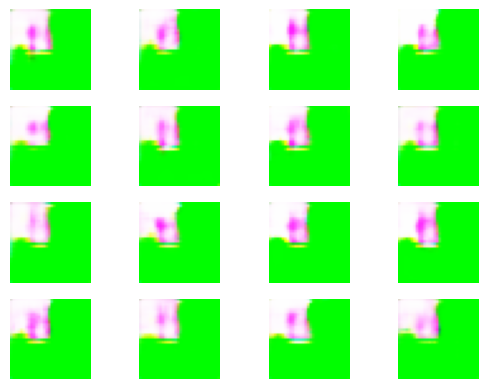

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 36ms/step
10002
1/1 [==============================] - 0s 35ms/step
10003
1/1 [==============================] - 0s 41ms/step
10004
1/1 [==============================] - 0s 35ms/step
10005
1/1 [==============================] - 0s 35ms/step
10006
1/1 [==============================] - 0s 34ms/step
10007
1/1 [==============================] - 0s 35ms/step
10008
1/1 [==============================] - 0s 37ms/step
10009
1/1 [==============================] - 0s 37ms/step
10010
1/1 [==============================] - 0s 39ms/step
10011
1/1 [==============================] - 0s 35ms/step
10012
1/1 [==============================] - 0s 35ms/step
10013
1/1 [==============================] - 0s 35ms/step
10014
1/1 [==============================] - 0s 37ms/step
10015
1/1 [==============================] - 0s 35ms/step
10016
1/1 [==============================] - 0s 38ms/step
10017
1/1 [================

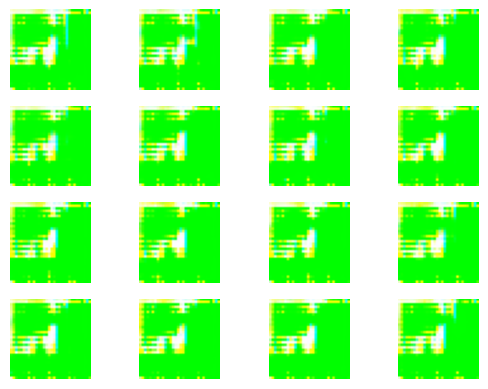

1/1 [==============================] - 0s 37ms/step
12501
1/1 [==============================] - 0s 43ms/step
12502
1/1 [==============================] - 0s 41ms/step
12503
1/1 [==============================] - 0s 41ms/step
12504
1/1 [==============================] - 0s 37ms/step
12505
1/1 [==============================] - 0s 36ms/step
12506
1/1 [==============================] - 0s 41ms/step
12507
1/1 [==============================] - 0s 40ms/step
12508
1/1 [==============================] - 0s 37ms/step
12509
1/1 [==============================] - 0s 38ms/step
12510
1/1 [==============================] - 0s 43ms/step
12511
1/1 [==============================] - 0s 37ms/step
12512
1/1 [==============================] - 0s 38ms/step
12513
1/1 [==============================] - 0s 39ms/step
12514
1/1 [==============================] - 0s 38ms/step
12515
1/1 [==============================] - 0s 47ms/step
12516
1/1 [==============================] - 0s 36ms/step
12517
1/1 [=========

In [8]:
num_epochs = 15000
batch_size = 32
display_interval = 2500
losses = []

# Normalizing the input
X = (X / 127.5) - 1.

# Defining the Adversarial ground truths
valid = np.ones((batch_size, 1))

# Adding some noise
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

for epoch in range(num_epochs):

            # Training the Discriminator

            # Sampling a random half of images
            index = np.random.randint(0, X.shape[0], batch_size)
            images = X[index]

            # Sampling noise and generating a batch of new images
            noise = np.random.normal(0, 1, (batch_size, latent_dimensions))
            generated_images = generator.predict(noise)

            # Training the discriminator to detect more accurately
            # whether a generated image is real or fake
            discm_loss_real = discriminator.train_on_batch(images, valid)
            discm_loss_fake = discriminator.train_on_batch(generated_images, fake)
            discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake)

            # Training the generator

            # Training the generator to generate images
            # that pass the authenticity test
            genr_loss = combined_network.train_on_batch(noise, valid)

            # Tracking training progress
            print(epoch)
            if epoch % display_interval == 0:
                 display_images()

1/1 [==============================] - 0s 33ms/step


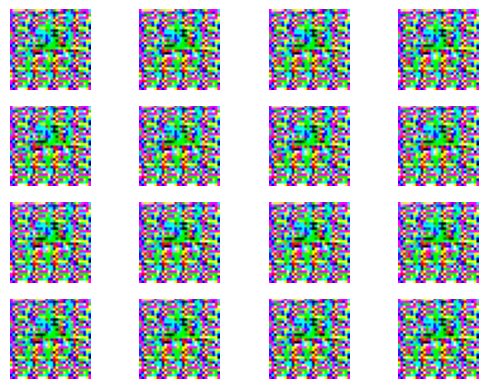

In [9]:
display_images()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=104e7b74-4307-4537-9235-5299b504c876' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>